# Libraries

In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from kaggle_clothing_attributes.config import load_config
from kaggle_clothing_attributes.preprocess import load_image

# Constants

In [2]:
CONFIG = load_config()
labels_path = Path(CONFIG["artifacts"]["labels_path"])
images_dir = Path(CONFIG["dataset"]["images_dir"])
SEED = CONFIG["run"]["seed"]
train_size = CONFIG["run"]["train_size"]
validation_size = CONFIG["run"]["validation_size"]

# Datasets Generation

In [3]:
labels_df = pd.read_csv(labels_path, index_col=0)

In [4]:
images = sorted([path.as_posix() for path in images_dir.glob("*.jpg")])

In [5]:
# Shuffle the sample indices
num_train_samples = int(train_size * len(images))
num_val_samples = int(validation_size * len(images))
indices = [i for i in range(len(images))]
random.Random(SEED).shuffle(indices)
train_indices = indices[:num_train_samples]
validation_indices = indices[num_train_samples : num_train_samples + num_val_samples]
test_indices = indices[num_train_samples + num_val_samples :]

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    ([images[i] for i in train_indices], labels_df.loc[train_indices].to_numpy())
)
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (
        [images[i] for i in validation_indices],
        labels_df.loc[validation_indices].to_numpy(),
    )
)
test_dataset = tf.data.Dataset.from_tensor_slices(
    ([images[i] for i in test_indices], labels_df.loc[test_indices].to_numpy())
)

In [7]:
# Saving the datasets
train_dataset.save(CONFIG["dataset"]["train_path"])
validation_dataset.save(CONFIG["dataset"]["validation_path"])
test_dataset.save(CONFIG["dataset"]["test_path"])

In [8]:
# Loading the datasets
train_dataset = tf.data.Dataset.load(CONFIG["dataset"]["train_path"])
validation_dataset = tf.data.Dataset.load(CONFIG["dataset"]["validation_path"])
test_dataset = tf.data.Dataset.load(CONFIG["dataset"]["test_path"])

In [9]:
# Datasets checking
for sample in train_dataset.take(1):
    print("Train sample:")
    print(sample, end="\n\n")

for sample in validation_dataset.take(1):
    print("Validation sample:")
    print(sample, end="\n\n")

for sample in test_dataset.take(1):
    print("Test sample:")
    print(sample, end="\n\n")

Train sample:
(<tf.Tensor: shape=(), dtype=string, numpy=b'../data/raw/images/001361.jpg'>, <tf.Tensor: shape=(26,), dtype=float64, numpy=
array([ 1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  3., nan, nan])>)

Validation sample:
(<tf.Tensor: shape=(), dtype=string, numpy=b'../data/raw/images/001816.jpg'>, <tf.Tensor: shape=(26,), dtype=float64, numpy=
array([ 1.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3., nan,  1.])>)

Test sample:
(<tf.Tensor: shape=(), dtype=string, numpy=b'../data/raw/images/000139.jpg'>, <tf.Tensor: shape=(26,), dtype=float64, numpy=
array([ 1., nan,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  3., nan, nan])>)



In [10]:
# Test mapping image loading function
train_dataset = train_dataset.map(lambda x, y: (load_image(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (load_image(x), y))
test_dataset = test_dataset.map(lambda x, y: (load_image(x), y))

Data type of x: <class 'tensorflow.python.framework.ops.EagerTensor'>
Data type of y: <class 'tensorflow.python.framework.ops.EagerTensor'>


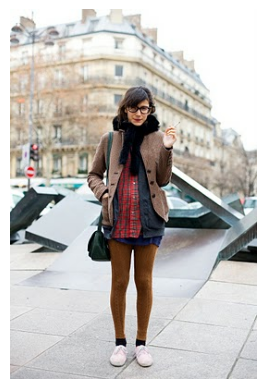

In [11]:
for sample in train_dataset.take(1):
    print(f"Data type of x: {type(sample[0])}")
    print(f"Data type of y: {type(sample[1])}")
    plt.imshow(sample[0])
    plt.axis("off")